### Fremont Bridge Bicycle Counter

In [1]:
import os 
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline
plt.style.use('seaborn')

In [21]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename = 'Fremont.csv', url = URL, force_download = False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, 'Fremont.csv')
    data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates = True)
    data.columns = ['Total','West', 'East']
    return data

In [22]:
data = get_fremont_data()

In [23]:
data.head()

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<AxesSubplot:xlabel='Date'>

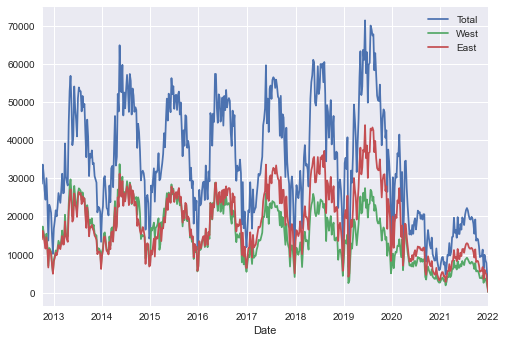

In [24]:
data.resample('w').sum().plot()

In [25]:
data.resample('w').sum()

,Total,West,East
Date,,,
2012-10-07,28584.0,14594.0,13990.0
2012-10-14,33590.0,17358.0,16232.0
2012-10-21,31018.0,15892.0,15126.0
2012-10-28,26874.0,13802.0,13072.0
2012-11-04,24388.0,12816.0,11572.0
...,...,...,...
2021-12-05,9951.0,3911.0,6040.0
2021-12-12,8526.0,3324.0,5202.0
2021-12-19,7826.0,3006.0,4820.0


<AxesSubplot:xlabel='Date'>

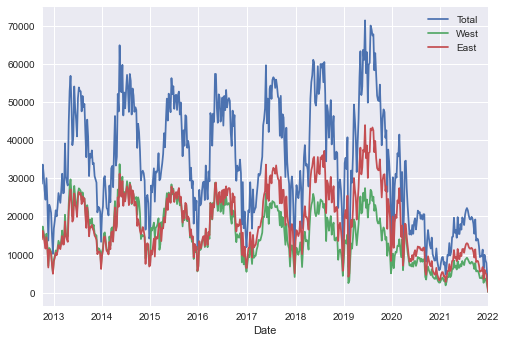

In [26]:
data.resample('w').sum().plot()

<AxesSubplot:xlabel='Date'>

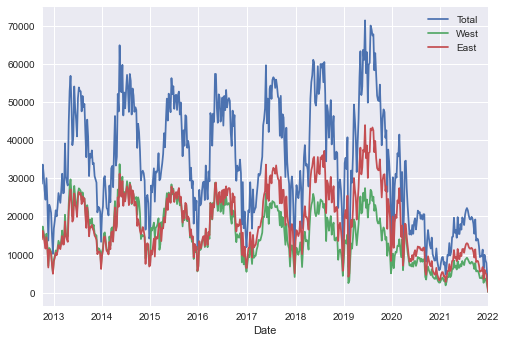

In [27]:
data.resample('w').sum().plot()

In [32]:
pd.options.display.max_rows = None

<AxesSubplot:xlabel='Date'>

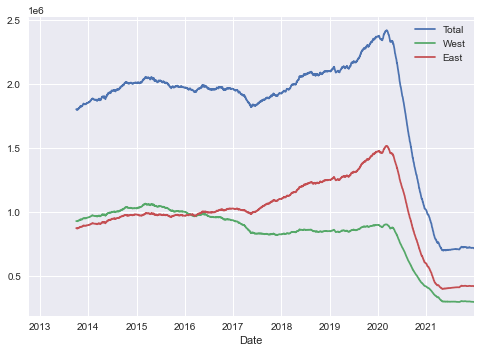

In [28]:
data.resample('D').sum().rolling(365).sum().plot()

(0.0, 2526684.75)

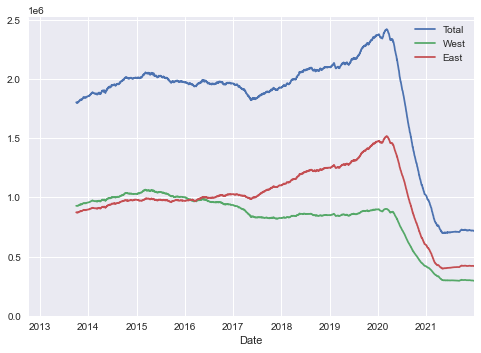

In [29]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

<AxesSubplot:xlabel='time'>

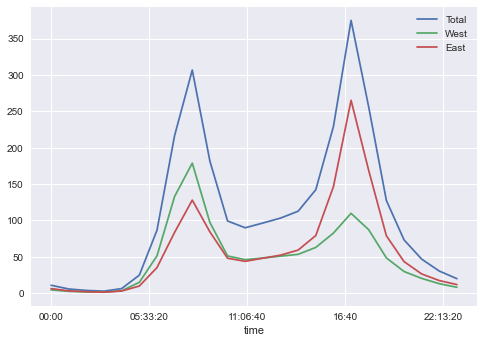

In [30]:
data.groupby(data.index.time).mean().plot()

In [34]:
pivoted = data.pivot_table('Total', index = data.index.time , columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

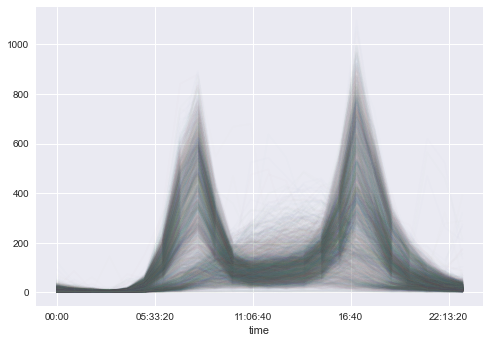

In [46]:
pivoted.plot(legend = False , alpha = 0.01)

In [31]:
data.head

<bound method NDFrame.head of                      Total  West  East
Date                                  
2019-11-01 00:00:00   12.0   7.0   5.0
2019-11-01 01:00:00    7.0   0.0   7.0
2019-11-01 02:00:00    1.0   0.0   1.0
2019-11-01 03:00:00    6.0   6.0   0.0
2019-11-01 04:00:00    6.0   5.0   1.0
...                    ...   ...   ...
2021-12-31 19:00:00    0.0   0.0   0.0
2021-12-31 20:00:00    0.0   0.0   0.0
2021-12-31 21:00:00    0.0   0.0   0.0
2021-12-31 22:00:00    0.0   0.0   0.0
2021-12-31 23:00:00    0.0   0.0   0.0

[147278 rows x 3 columns]>

In [35]:
pivoted.shape

(24, 3376)

In [41]:
X = pivoted.fillna(0).T.values
X.shape

(3376, 24)

In [42]:
from sklearn.decomposition import PCA

In [43]:
X2 = PCA(2, svd_solver= 'full').fit_transform(X)

In [44]:
X2.shape

(3376, 2)

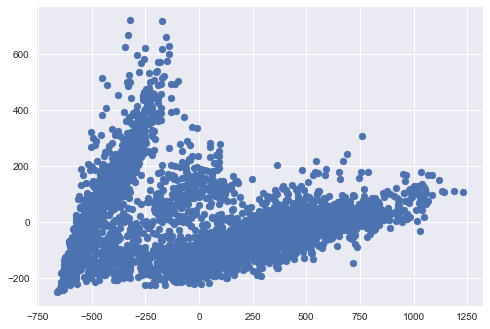

In [48]:
plt.scatter(X2[:, 0], X2[:, 1])

In [49]:
from sklearn.mixture import GaussianMixture

In [51]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 0])

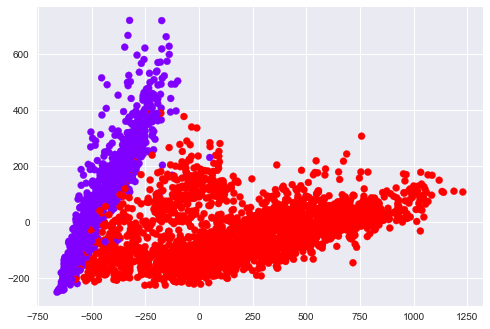

In [53]:
plt.scatter(X2[:,0], X2[:,1], c = labels, cmap = 'rainbow')

<AxesSubplot:xlabel='time'>

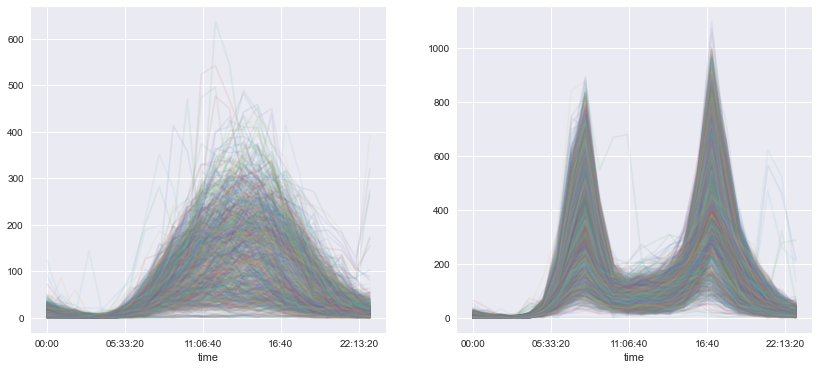

In [92]:
fig , ax  = plt.subplots(1,2, figsize = (14,6))

pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.1, ax = ax[0])
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.1, ax = ax[1])

ax[0].set_title('Purple Clauster')
ax[1].set_title('Red Claster')

In [79]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

In [77]:
dayofweek 

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            2, 3, 4, 5, 6, 0, 1, 2, 3, 4],
           dtype='int64', length=3376)

/var/folders/lr/8338t7dx0wbbwx8wvn4b0c180000gn/T/ipykernel_10089/2441499.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


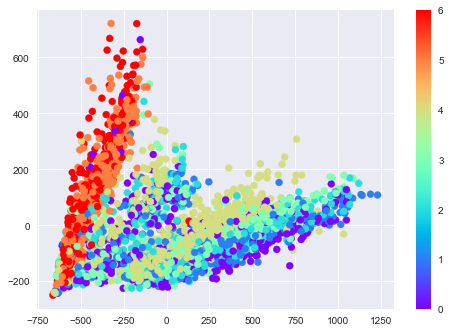

In [81]:
plt.scatter(X2[:,0], X2[:,1], c = dayofweek, cmap = 'rainbow')
plt.colorbar()

In [82]:
dates = pd.DatetimeIndex(pivoted.columns)

In [87]:
dates.shape, labels.shape, dayofweek.shape

((3376,), (3376,), (3376,))

In [89]:
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29', '2013-12-20', '2013-12-25',
               '2014-01-01', '2014-04-23', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-11-27', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2018-01-01',
               '2018-05-28', '2018-07-04', '2018-09-03', '2018-11-22',
               '2018-11-23', '2018-12-24', '2018-12-25', '2019-01-01',
               '2019-02-04', '2019-02-05', '2019-02-08', '2019-02-11',
      